**Group Members:**

 _ |Names | Student Number
---|---|---
1| Bongumusa Mavuso | 1682836
2| Thabo Rachidi | 1632496
3| Thobelani Makeleni | 1199116
4| Siyabonga Hlomuka | 1384685



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1.1.4 Dimensionality reduction: PCA

In [2]:
df_penguin = pd.read_csv('data/penguins.csv')

# Drop missing values
df_penguin = df_penguin.dropna()
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Use only numerical datatype for pca
penguin_data = df_penguin.select_dtypes(np.number)
penguin_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [4]:
# The remaining object types
penguin_info = df_penguin.select_dtypes(exclude='float')
penguin_info.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,FEMALE
5,Adelie,Torgersen,MALE


In [5]:
species = penguin_info.species.unique()
island = penguin_info.island.unique()
sex = penguin_info.sex.unique()
print('species:\n',species)
print('island:\n', island)
print('sex:\n', sex)

species:
 ['Adelie' 'Chinstrap' 'Gentoo']
island:
 ['Torgersen' 'Biscoe' 'Dream']
sex:
 ['MALE' 'FEMALE']


In [6]:
def encode_sex(s):
    if s == 'MALE':
        return 0
    return 1
def encode_species(s):
    if s == 'Adelie':
        return 0
    if s == 'Chinstrap':
        return 1
    if s == 'Gentoo':
        return 2
island_dict = dict(enumerate(island.flatten(), 0))
island_dict = dict((v,k) for k,v in island_dict.items())
def encode_island(i):
     return island_dict[i]
sexes = df_penguin.sex.apply(encode_sex)
sps = df_penguin.species.apply(encode_species)
islands = df_penguin.island.apply(encode_island)

In [7]:
# Standardize the dataset
scaler = StandardScaler()

pca1 = PCA(n_components=2)
x_pca = pca1.fit_transform(scaler.fit_transform(penguin_data))

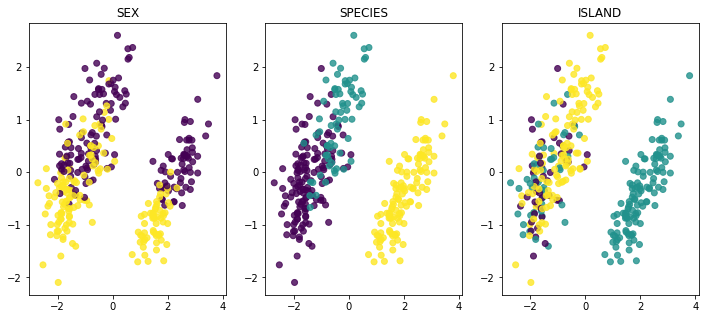

In [8]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))

axs[0].scatter(x_pca[:, 0], x_pca[:, 1], c=sexes, alpha=0.8, marker='o')
axs[0].set_title('SEX')
axs[1].scatter(x_pca[:, 0], x_pca[:, 1], c=sps, alpha=0.8, marker='o')
axs[1].set_title('SPECIES')
axs[2].scatter(x_pca[:, 0], x_pca[:, 1], c=islands, alpha=0.8, marker='o')
axs[2].set_title('ISLAND')
plt.show()

We plotted three diagrams in order to visualize what the 2 components picked. The features were groups better by species than the two other categorical features.

In [9]:
def plot_cumul_var(pcamodel):
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
             np.cumsum(pcamodel.explained_variance_),
             c='red',
             label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()


def plot_expl_var_ratio(pcamodel):
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

#PCA1 is at 0 in xscale

def plot_expl_variance(pcamodel):
    plt.plot(pcamodel.explained_variance_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

def plot_heatmap(pcamodel, columns):
    ax = sns.heatmap(pcamodel.components_,
                     cmap='YlGnBu',
                     yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                     xticklabels=columns,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.show()

### 1.1.4 Explained Variance for PCA with 2 components

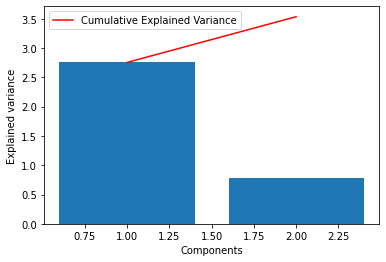

Total Variance Captured by Principle Components: 88.08682242049917%


In [10]:
# plot variance ratio
plot_cumul_var(pca1)
# plot a heatmap showing which variables are contributing to each PC
print('Total Variance Captured by Principle Components: {0}%'.format(pca1.explained_variance_ratio_.sum()*100.))

In [11]:
pca2 = PCA(n_components=4)
x_pca2 = pca2.fit_transform(scaler.fit_transform(penguin_data))

### Explained Variance for the PCA with 4 components

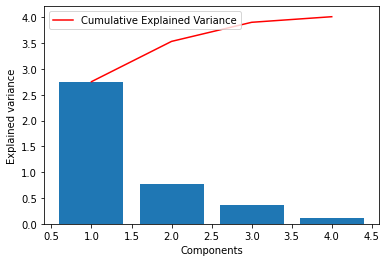

Total Variance Captured by Principle Components: 99.99999999999999%


In [12]:
# plot variance ratio
plot_cumul_var(pca2)
# plot_expl_var_ratio(pca2)
# plot a heatmap showing which variables are contributing to each PC
# plot_heatmap(pca1, list(penguin_data.columns))
print('Total Variance Captured by Principle Components: {0}%'.format(pca2.explained_variance_ratio_.sum()*100.))


The PCA with four components captured more total variance.

### 1.1.4.2

In [13]:
# PCA with unstandardized data
x_pca3 = pca2.fit_transform(penguin_data)

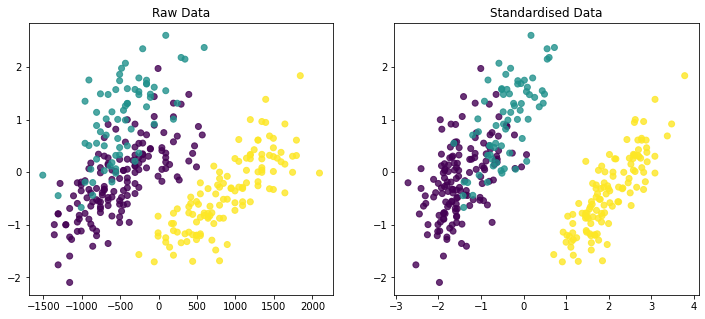

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].scatter(x_pca3[:, 0], x_pca[:, 1],c = sps, alpha=0.8, marker='o')
axs[0].set_title('Raw Data')
axs[1].scatter(x_pca[:, 0], x_pca[:, 1], c = sps, alpha=0.8, marker='o')
axs[1].set_title('Standardised Data')
plt.show()

We used species to differentiate the visualization of the first two components picked.It is easy to tell the separability of the components in the standardized data than in the raw data.
